In [1]:
import requests
import matplotlib.pyplot as plt

# APIs

An Application Programming Interface, or API, is a structured way to retrieve data from a website. Using an API is safer and easier than something like webscraping, since what you get back is already in a usable format. Many organizations use APIs like:
- Government organizations ([US Government](https://www.data.gov/developers/apis))
- Large companies ([Twitter API](https://developer.twitter.com/en/docs))
- News organizations ([NYT API](https://developer.nytimes.com/))
- And [many more](https://github.com/public-apis/public-apis)

If you type `how to use an api in python` in google, you get back many articles walking through how to use an API. It is a well documented and useful tool to be familiar with.

## Basic API Usage

Let's start by using the Numbers API, an API which provides interesting facts about numbers.

With any API, you should start by inspecting the documentation. For the Numbers API, the documentation is located here: http://numbersapi.com

We will be using the `requests` package to make a `GET` request to an API. Similar to webscraping, APIs require an endpoint to tell python where to send the request.

When using an API, the first thing we need to know is the expected URL structure. In this case, it is http://numbersapi.com/number/type where number is the number for which we want an interesting fact and type indicates which type of fact we want. Note that type can be omitted, and it will default to trivia.

In [30]:
endpoint = 'http://numbersapi.com/8'

response = requests.get(endpoint)

Let's check the response. If all is well, we should have a 200 response.

In [3]:
response

<Response [200]>

To access the content of the response, we can look at the `text` attribute.

In [31]:
response.text

'8 is the number of planets in the Solar System.'

What if we want to be able to easily change the number that we want to retrieve. For this, we can make use of an f-string. 

In [5]:
number = 95

endpoint = f'http://numbersapi.com/{number}'

response = requests.get(endpoint)

response.text

'95 is the NBA record for Most Assists in a 7-game playoff series (by Magic Johnson of the Los Angeles Lakers in 1984).'

This API also allows for batch requests: http://numbersapi.com#batching

In [6]:
number_range = "1..10"

endpoint = f'http://numbersapi.com/{number_range}'

response = requests.get(endpoint)

We can look at the response as text.

In [7]:
response.text

'{\n "1": "1 is the number of dimensions of a line.",\n "2": "2 is the number of stars in a binary star system (a stellar system consisting of two stars orbiting around their center of mass).",\n "3": "3 is number of performers in a trio.",\n "4": "4 is the number of bits in a nibble, equivalent to half a byte.",\n "5": "5 is the number of interlocked rings in the symbol of the Olympic Games, representing the number of inhabited continents represented by the Olympians (counting North America and South America as one continent).",\n "6": "6 is the number of dots in a Braille cell.",\n "7": "7 is the number of seconds it takes \\"Superman: Escape from Krypton\\" roller coaster to go from 0 to 100 miles per hour.",\n "8": "8 is the number of principles of Yong in Chinese calligraphy.",\n "9": "9 is the number of circles of Hell in Dante\'s Divine Comedy.",\n "10": "10 is the average thickness of the Arctic ice sheet in feet."\n}'

However, it will be easier to work with as a json. We can use the `json` method to convert the results to a dictionary.

In [8]:
res = response.json()
res

{'1': '1 is the number of dimensions of a line.',
 '2': '2 is the number of stars in a binary star system (a stellar system consisting of two stars orbiting around their center of mass).',
 '3': '3 is number of performers in a trio.',
 '4': '4 is the number of bits in a nibble, equivalent to half a byte.',
 '5': '5 is the number of interlocked rings in the symbol of the Olympic Games, representing the number of inhabited continents represented by the Olympians (counting North America and South America as one continent).',
 '6': '6 is the number of dots in a Braille cell.',
 '7': '7 is the number of seconds it takes "Superman: Escape from Krypton" roller coaster to go from 0 to 100 miles per hour.',
 '8': '8 is the number of principles of Yong in Chinese calligraphy.',
 '9': "9 is the number of circles of Hell in Dante's Divine Comedy.",
 '10': '10 is the average thickness of the Arctic ice sheet in feet.'}

Then, we can access the individual entries by passing in the correct key.

In [9]:
res['5']

'5 is the number of interlocked rings in the symbol of the Olympic Games, representing the number of inhabited continents represented by the Olympians (counting North America and South America as one continent).'

Finally, notice that we can ask for a fact about a random number.

In [10]:
endpoint = 'http://numbersapi.com/random'

response = requests.get(endpoint)

response.text

'1e+40 is the Eddington–Dirac number.'

We can specify a minimum and maximum for these random numbers: http://numbersapi.com#min-and-max

#### Parameters

Parameters are specific to each API and indicate what information you want back. These can be compared to the various ways you slice a table or df to get just the subset you want. Some parameters are required, others are optional. Always look at the documentation to know what parameters you should include and what are possible values for each one. When using parameters for an API call, you can do the following:

1. Make an empty dictionary for the `params` variable
2. Look at the documentation to know what parameters you should include, add these as **keys** to the dictionary
3. Add the appropriate values for each parameter as the **values** for the dictionary

For example, let's get a fact about a random number between 500 and 600

In [11]:
endpoint = 'http://numbersapi.com/random'

params = {
    'min': 500,
    'max': 600
}

response = requests.get(endpoint, params = params)

response.text

'555 is the number of keyboard sonatas written by Domenico Scarlatti, according to the catalog by Ralph Kirkpatrick.'

### NASA API and API Keys

Now, let's work with the NASA API: https://api.nasa.gov/

One of the main ways APIs maintain security is by the use of some form of authentication, such as an API key. An API key can be obtained in a number of ways, depending on the API, and is a way for the application to know who you are and provides you secure access to the data.

To work with the NASA API, you'll need to create an API key.

1. Scroll down and enter your First Name, Last Name, and email to generate an API key
2. Copy the API key into the keys.json file.

**DO NOT SHARE YOUR API KEYS OR PUT THEM IN A PUBLIC PLACE LIKE GITHUB**

API keys should be stored securely on your computer and removed from any code or documents you share.

Now, we can safely load your key into a variable using the json library.

In [40]:
import json

In [41]:
with open('keys.json') as fi:
    credentials = json.load(fi)

In [42]:
api_key = credentials['api_key']

1. Look at the different available APIs in the `Browse APIs` tab
2. Click on the **Asteroids - NeoWs**
3. Under **Neo - Feed**, copy the second line into the endpoint variable below as a string and delete the last `?`

In [ ]:
0CdAc9n22HwW6OqBDAI2ItLZxhKUebzLVHkDfrbe

In [52]:
api_key

'0CdAc9n22HwW6OqBDAI2ItLZxhKUebzLVHkDfrbe'

In [53]:
endpoint = 'https://api.nasa.gov/neo/rest/v1/feed?'

Fill in the parameters dictionary below to retrieve information on all NeoWs between January 1, 2022 and January 7, 2022. (Be sure the include your api key as a parameter).

In [54]:
params = {
    'start_date':'2022-01-01',
    'end_date': '2022-01-07',
    'api_key': api_key

}

You now have all the pieces to make an API request

In [55]:
response = requests.get(endpoint, params = params)

See what was saved to `response`

In [56]:
response

<Response [200]>

This API returns the results as a json, so we'll access them using the `json` method.

In [57]:
res = response.json()
res

{'links': {'next': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-07&end_date=2022-01-13&detailed=false&api_key=0CdAc9n22HwW6OqBDAI2ItLZxhKUebzLVHkDfrbe',
  'previous': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2021-12-26&end_date=2022-01-01&detailed=false&api_key=0CdAc9n22HwW6OqBDAI2ItLZxhKUebzLVHkDfrbe',
  'self': 'http://api.nasa.gov/neo/rest/v1/feed?start_date=2022-01-01&end_date=2022-01-07&detailed=false&api_key=0CdAc9n22HwW6OqBDAI2ItLZxhKUebzLVHkDfrbe'},
 'element_count': 101,
 'near_earth_objects': {'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2216523?api_key=0CdAc9n22HwW6OqBDAI2ItLZxhKUebzLVHkDfrbe'},
    'id': '2216523',
    'neo_reference_id': '2216523',
    'name': '216523 (2001 HY7)',
    'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523',
    'absolute_magnitude_h': 20.6,
    'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2016299194,
      'estimated_diameter_max': 0.4508582062},
     'meters': {'es

In [ ]:
res.keys()

The information that we're interested in is located under `near_earth_objects`.

In [58]:
res['near_earth_objects']

{'2022-01-07': [{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/2216523?api_key=0CdAc9n22HwW6OqBDAI2ItLZxhKUebzLVHkDfrbe'},
   'id': '2216523',
   'neo_reference_id': '2216523',
   'name': '216523 (2001 HY7)',
   'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523',
   'absolute_magnitude_h': 20.6,
   'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.2016299194,
     'estimated_diameter_max': 0.4508582062},
    'meters': {'estimated_diameter_min': 201.6299194428,
     'estimated_diameter_max': 450.8582061718},
    'miles': {'estimated_diameter_min': 0.1252869847,
     'estimated_diameter_max': 0.2801502144},
    'feet': {'estimated_diameter_min': 661.5155049046,
     'estimated_diameter_max': 1479.1936371367}},
   'is_potentially_hazardous_asteroid': True,
   'close_approach_data': [{'close_approach_date': '2022-01-07',
     'close_approach_date_full': '2022-Jan-07 06:54',
     'epoch_date_close_approach': 1641538440000,
     'relative_velocity': {'ki

In [59]:
res['near_earth_objects'].keys()

dict_keys(['2022-01-07', '2022-01-03', '2022-01-04', '2022-01-05', '2022-01-06', '2022-01-01', '2022-01-02'])

**Question:** How many near earth objects were there on January 3?

In [60]:
# Your Code Here
len(res['near_earth_objects']['2022-01-03'])


13

In [61]:
res['near_earth_objects']['2022-01-03']


[{'links': {'self': 'http://api.nasa.gov/neo/rest/v1/neo/3313974?api_key=0CdAc9n22HwW6OqBDAI2ItLZxhKUebzLVHkDfrbe'},
  'id': '3313974',
  'neo_reference_id': '3313974',
  'name': '(2006 BV39)',
  'nasa_jpl_url': 'http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=3313974',
  'absolute_magnitude_h': 29.1,
  'estimated_diameter': {'kilometers': {'estimated_diameter_min': 0.0040230458,
    'estimated_diameter_max': 0.0089958039},
   'meters': {'estimated_diameter_min': 4.0230457983,
    'estimated_diameter_max': 8.9958038817},
   'miles': {'estimated_diameter_min': 0.002499804,
    'estimated_diameter_max': 0.0055897317},
   'feet': {'estimated_diameter_min': 13.198969577,
    'estimated_diameter_max': 29.5137932072}},
  'is_potentially_hazardous_asteroid': False,
  'close_approach_data': [{'close_approach_date': '2022-01-03',
    'close_approach_date_full': '2022-Jan-03 18:46',
    'epoch_date_close_approach': 1641235560000,
    'relative_velocity': {'kilometers_per_second': '22.7391653876',
     'ki

**Question:** Is the first returned result for January 3 potentially hazardous (as indicated by the `is_potentially_hazardous_asteroid` field)?

In [ ]:
# Your Code Here

**Question:** What was the relative velocity, in miles per hour of the first object returned for January 3?

In [ ]:
# Your Code Here

The for loop below iterates over the data returned and pulls out information for each asteroid. It then saves the information to lists, that are used for making a scatter plot of the asteroids.

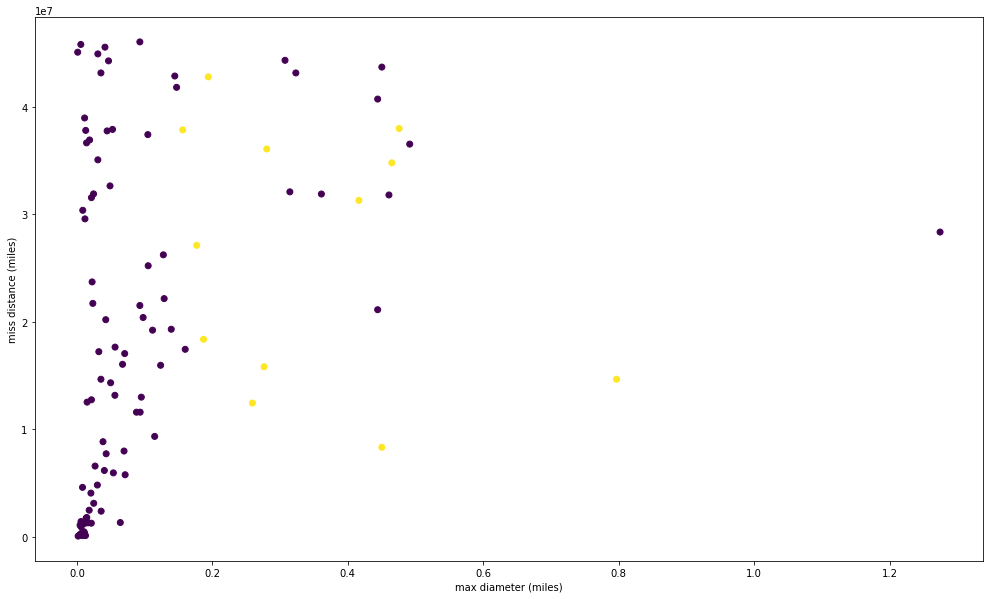

In [62]:
max_diam = []
hazardous = []
miss_dist = []
for day, objs in res['near_earth_objects'].items():
    for obj in objs:
        max_diam.append(float(obj['estimated_diameter']['miles']['estimated_diameter_max']))
        hazardous.append(obj['is_potentially_hazardous_asteroid'])
        miss_dist.append(float(obj['close_approach_data'][0]['miss_distance']['miles']))

plt.figure(figsize = (17, 10))
plt.scatter(max_diam, miss_dist, c = hazardous)
plt.xlabel('max diameter (miles)')
plt.ylabel('miss distance (miles)');

If you want to work with the response from an API using _pandas_, you'll want to convert it to a DataFrame. In some circumstances, you can easily convert a json to a DataFrame, but in other cases, you have to do a little bit of work.

In [64]:
import pandas as pd

The easiest case is when you have a list of dictionaries. Here, you can simply use the `DataFrame` constructor. Let's see how this works using one of the days. If you wanted to get all of the results into a single DataFrame, you could iterate through and concatenate. 

In [65]:
pd.DataFrame(response.json()['near_earth_objects']['2022-01-07']).head(2)

,links,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,estimated_diameter,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object
0,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2216523,2216523,216523 (2001 HY7),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523,20.60,{'kilometers': {'estimated_diameter_min': 0.20...,True,"[{'close_approach_date': '2022-01-07', 'close_...",False
1,{'self': 'http://api.nasa.gov/neo/rest/v1/neo/...,2494697,2494697,494697 (2004 SW55),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2494697,20.77,{'kilometers': {'estimated_diameter_min': 0.18...,True,"[{'close_approach_date': '2022-01-07', 'close_...",False


You'll notice that we still have dictionaries in some of the columns. This can be remedied using the `json_normalize` function.

In [66]:
pd.json_normalize(response.json()['near_earth_objects']['2022-01-07']).head(2)

,id,neo_reference_id,name,nasa_jpl_url,absolute_magnitude_h,is_potentially_hazardous_asteroid,close_approach_data,is_sentry_object,links.self,estimated_diameter.kilometers.estimated_diameter_min,estimated_diameter.kilometers.estimated_diameter_max,estimated_diameter.meters.estimated_diameter_min,estimated_diameter.meters.estimated_diameter_max,estimated_diameter.miles.estimated_diameter_min,estimated_diameter.miles.estimated_diameter_max,estimated_diameter.feet.estimated_diameter_min,estimated_diameter.feet.estimated_diameter_max
0,2216523,2216523,216523 (2001 HY7),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2216523,20.60,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,http://api.nasa.gov/neo/rest/v1/neo/2216523?ap...,0.201630,0.450858,201.629919,450.858206,0.125287,0.280150,661.515505,1479.193637
1,2494697,2494697,494697 (2004 SW55),http://ssd.jpl.nasa.gov/sbdb.cgi?sstr=2494697,20.77,True,"[{'close_approach_date': '2022-01-07', 'close_...",False,http://api.nasa.gov/neo/rest/v1/neo/2494697?ap...,0.186447,0.416908,186.446818,416.907760,0.115853,0.259054,611.702179,1367.807655


This almost does it, but the `close_approach_data` column contains a list, which `json_normalize` can't handle. To fix this, we can use the `explode` method which will unpack the list across multiple columns, if needed.

In [ ]:
response_df = pd.json_normalize(response.json()['near_earth_objects']['2022-01-07'])
response_df.explode('close_approach_data').head(2)

Once exploded, you can use the `json_normalize` function again.

In [ ]:
pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data']).head(2)

And finally, you can concatenate the two pieces together.

In [ ]:
pd.concat([
    response_df.explode('close_approach_data').drop(columns = ['close_approach_data']),
    pd.json_normalize(response_df.explode('close_approach_data')['close_approach_data'])
], axis = 1).head(2)

Let's try another `endpoint` from NASA. This time copy the endpoint from the **APOD** (Astronomy Picture of the Day) section.

Fill in the endpoint and parameters in order to retrieve the image for January 1, 2019.

In [ ]:
endpoint = ''

params = {

}

In [ ]:
response = requests.get(endpoint, params = params)

In [ ]:
response

In [ ]:
response.json()

Finally, let's grab the image url so that we can retrieve the actual image.

In [ ]:
image_response = requests.get(response.json()['url'])

For image responses, we don't want to look at the text or json, but instead take the content. We'll now use the `.content` attribute from the response to render an image.

In [ ]:
from IPython.display import Image

In [ ]:
Image(image_response.content)